## Import Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Read CSV

In [31]:
df = pd.read_csv("allyear.csv")
df2 = df.corr().abs()

In [32]:
df3 = df2[df2['POP_SNAP'] > 0.6]

In [33]:
df3

,population,unemploymentRate,povertyRate,medianIncome,avgmealmon,homeless,pplweekmon,drivealone,carpooled,publicTrans,walked,meanHouseIncome,yeshealth,privatehealth,publichealth,nohealth,POP_SNAP
population,1.000000,0.263586,0.090570,0.084500,0.019133,0.591383,0.050700,0.945830,0.942731,0.674527,0.686380,0.224894,0.998130,0.975020,0.940448,0.861809,0.660805
povertyRate,0.090570,0.500398,1.000000,0.848366,0.287375,0.384512,0.690082,0.112686,0.162925,0.318465,0.401652,0.749107,0.047779,0.089406,0.310709,0.415315,0.674003
homeless,0.591383,0.025236,0.384512,0.266453,0.108051,1.000000,0.453408,0.449822,0.523188,0.569306,0.581056,0.064108,0.562882,0.473726,0.670776,0.684638,0.746321
carpooled,0.942731,0.263877,0.162925,0.041811,0.113825,0.523188,0.085880,0.892804,1.000000,0.613113,0.664018,0.160592,0.938223,0.910184,0.885444,0.839203,0.674770
publicTrans,0.674527,0.138395,0.318465,0.091909,0.026737,0.569306,0.165905,0.422139,0.613113,1.000000,0.947683,0.068612,0.645294,0.573866,0.652674,0.831374,0.679789
walked,0.686380,0.087871,0.401652,0.164310,0.060991,0.581056,0.190965,0.438373,0.664018,0.947683,1.000000,0.001881,0.654390,0.570985,0.692385,0.876404,0.755258
yeshealth,0.998130,0.279376,0.047779,0.118544,0.017426,0.562882,0.083486,0.959275,0.938223,0.645294,0.654390,0.250363,1.000000,0.985432,0.929147,0.830742,0.623689
publichealth,0.940448,0.146743,0.310709,0.157232,0.065868,0.670776,0.128149,0.844619,0.885444,0.652674,0.692385,0.006497,0.929147,0.858666,1.000000,0.878965,0.816768
nohealth,0.861809,0.078733,0.415315,0.193366,0.028130,0.684638,0.211323,0.684538,0.839203,0.831374,0.876404,0.007616,0.830742,0.743158,0.878965,1.000000,0.864358
POP_SNAP,0.660805,0.096361,0.674003,0.475714,0.138293,0.746321,0.443268,0.463006,0.674770,0.679789,0.755258,0.318795,0.623689,0.489266,0.816768,0.864358,1.000000


## SNAP Cutoff

In [34]:
drop1 = ['unemploymentRate', 'medianIncome', 'avgmealmon', 'pplweekmon', 'drivealone', 'meanHouseIncome', 'privatehealth']
df3.drop(drop1, axis=1, inplace=True)

/Users/myra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
df3

,population,povertyRate,homeless,carpooled,publicTrans,walked,yeshealth,publichealth,nohealth,POP_SNAP
population,1.000000,0.090570,0.591383,0.942731,0.674527,0.686380,0.998130,0.940448,0.861809,0.660805
povertyRate,0.090570,1.000000,0.384512,0.162925,0.318465,0.401652,0.047779,0.310709,0.415315,0.674003
homeless,0.591383,0.384512,1.000000,0.523188,0.569306,0.581056,0.562882,0.670776,0.684638,0.746321
carpooled,0.942731,0.162925,0.523188,1.000000,0.613113,0.664018,0.938223,0.885444,0.839203,0.674770
publicTrans,0.674527,0.318465,0.569306,0.613113,1.000000,0.947683,0.645294,0.652674,0.831374,0.679789
walked,0.686380,0.401652,0.581056,0.664018,0.947683,1.000000,0.654390,0.692385,0.876404,0.755258
yeshealth,0.998130,0.047779,0.562882,0.938223,0.645294,0.654390,1.000000,0.929147,0.830742,0.623689
publichealth,0.940448,0.310709,0.670776,0.885444,0.652674,0.692385,0.929147,1.000000,0.878965,0.816768
nohealth,0.861809,0.415315,0.684638,0.839203,0.831374,0.876404,0.830742,0.878965,1.000000,0.864358
POP_SNAP,0.660805,0.674003,0.746321,0.674770,0.679789,0.755258,0.623689,0.816768,0.864358,1.000000


## Variable Cutoff

In [36]:
upper = df3.where(np.triu(np.ones(df3.shape), k=1).astype(bool))

# Find features with correlation greater than 0.67
to_drop = [column for column in upper.columns if any(upper[column] > 0.83)]

# Drop features 
df3.drop(to_drop, axis=1, inplace=True)

/Users/myra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
df3

,population,povertyRate,homeless,publicTrans
population,1.000000,0.090570,0.591383,0.674527
povertyRate,0.090570,1.000000,0.384512,0.318465
homeless,0.591383,0.384512,1.000000,0.569306
carpooled,0.942731,0.162925,0.523188,0.613113
publicTrans,0.674527,0.318465,0.569306,1.000000
walked,0.686380,0.401652,0.581056,0.947683
yeshealth,0.998130,0.047779,0.562882,0.645294
publichealth,0.940448,0.310709,0.670776,0.652674
nohealth,0.861809,0.415315,0.684638,0.831374
POP_SNAP,0.660805,0.674003,0.746321,0.679789


In [38]:
drop3 = ['carpooled', 'walked', 'yeshealth', 'publichealth', 'nohealth', 'POP_SNAP']
df3.drop(drop3, inplace=True)

/Users/myra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
df3

,population,povertyRate,homeless,publicTrans
population,1.000000,0.090570,0.591383,0.674527
povertyRate,0.090570,1.000000,0.384512,0.318465
homeless,0.591383,0.384512,1.000000,0.569306
publicTrans,0.674527,0.318465,0.569306,1.000000


In [40]:
opvars = ['population', 'povertyRate', 'homeless', 'publicTrans','POP_SNAP']
df = df[opvars]
df

,population,povertyRate,homeless,publicTrans,POP_SNAP
0,263670,0.111,357,4174,32072
1,932202,0.056,271,82264,30301
2,445349,0.055,518,6989,19123
3,506471,0.107,603,15967,59120
4,92039,0.088,90,232,6712
...,...,...,...,...,...
100,63732,0.114,38,201,9325
101,329626,0.052,342,8140,12874
102,143004,0.048,57,1040,4735
103,549905,0.106,504,34254,49795


In [41]:
df

,population,povertyRate,homeless,publicTrans,POP_SNAP
0,263670,0.111,357,4174,32072
1,932202,0.056,271,82264,30301
2,445349,0.055,518,6989,19123
3,506471,0.107,603,15967,59120
4,92039,0.088,90,232,6712
...,...,...,...,...,...
100,63732,0.114,38,201,9325
101,329626,0.052,342,8140,12874
102,143004,0.048,57,1040,4735
103,549905,0.106,504,34254,49795


In [42]:
df.to_csv('method2B.csv')

In [43]:
df.cov()

,population,povertyRate,homeless,publicTrans,POP_SNAP
population,6.581904e+10,945.568793,6.543579e+07,6.368860e+09,5.595003e+09
povertyRate,9.455688e+02,0.001656,6.748580e+00,4.769589e+02,9.052007e+02
homeless,6.543579e+07,6.748580,1.860120e+05,9.036562e+06,1.062300e+07
publicTrans,6.368860e+09,476.958879,9.036562e+06,1.354482e+09,8.256802e+08
POP_SNAP,5.595003e+09,905.200724,1.062300e+07,8.256802e+08,1.089187e+09


In [44]:
df.var()

population     6.581904e+10
povertyRate    1.656014e-03
homeless       1.860120e+05
publicTrans    1.354482e+09
POP_SNAP       1.089187e+09
dtype: float64

# Multiple Linear Regression

In [45]:
df = pd.read_csv("method2B.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [46]:
df

,population,povertyRate,homeless,publicTrans,POP_SNAP
0,263670,0.111,357,4174,32072
1,932202,0.056,271,82264,30301
2,445349,0.055,518,6989,19123
3,506471,0.107,603,15967,59120
4,92039,0.088,90,232,6712
...,...,...,...,...,...
100,63732,0.114,38,201,9325
101,329626,0.052,342,8140,12874
102,143004,0.048,57,1040,4735
103,549905,0.106,504,34254,49795


In [47]:
x = df.drop(['POP_SNAP'],axis=1).values
y = df['POP_SNAP'].values

In [48]:
# splitting dataset into training and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [49]:
# training model on training set

ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [50]:
# predict test set results
y_pred=ml.predict(x_test)
print(y_pred)

[ 37472.51661362  44139.51721683  21314.03061347   1779.27239737
  56316.58744753 122249.28169458  21040.87521722  17018.27505953
  43831.96397044  52026.82605533  55812.70143697  19472.16363943
 -10195.25419545  21968.36882611  14454.25811507  -5236.5558468
  56499.52159903  60180.94407237  33727.96312545  93470.97028766
  55787.44897429  56819.45499406  49260.79367113  56268.99917018
  51854.70005424  35199.48558629 116721.60900722  47732.13463923
  50777.92715866  25120.7817923   49376.9351457   52896.57041449]


In [51]:
#ml.predict([[4.875000,63389,3.43,62.840000,100267]])

Text(0.5, 1.0, 'Method 1B')

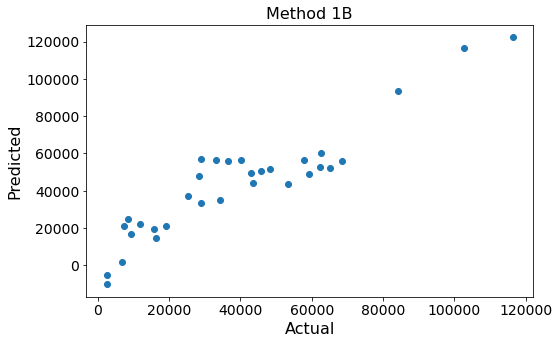

In [52]:
# scatterplot of results
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Predicted', fontsize=16)
plt.title('Method 1B', fontsize=16)

In [53]:
pred_y_df = pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
0,25400,37472.516614,-12072.516614
1,43657,44139.517217,-482.517217
2,19123,21314.030613,-2191.030613
3,6672,1779.272397,4892.727603
4,40208,56316.587448,-16108.587448
5,116345,122249.281695,-5904.281695
6,7269,21040.875217,-13771.875217
7,9325,17018.275060,-7693.275060
8,53298,43831.963970,9466.036030
9,65177,52026.826055,13150.173945


In [54]:
# define our intput
X2 = sm.add_constant(x)

# create a OLS model
model = sm.OLS(y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     159.6
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           1.69e-42
Time:                        15:29:57   Log-Likelihood:                -1136.0
No. Observations:                 105   AIC:                             2282.
Df Residuals:                     100   BIC:                             2295.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.448e+04   4141.112     -8.326      0.0